In [1]:
# Import packages
import os
import pandas as pd
import zipfile as zip
import seaborn as sns
import matplotlib.pyplot as plt


In [10]:
# Data Preparation
try:

    # Unzip the dataset from the zip archive
    with zip.ZipFile("netflix_data.zip", mode="r") as zipper:
        zipper.extract(member="netflix_data .csv")
         # Rename the file name    
        os.rename(src="netflix_data.csv", dst="Netflix_shows_movies.csv")

# Error Handling for Exception
except Exception as e:
    error_message = {"message":str(e)}
    print(error_message)

    
   

{'message': "[WinError 2] The system cannot find the file specified: 'netflix_data.csv' -> 'Netflix_shows_movies.csv'"}


In [14]:
#Data Cleaning

try:

    # Import the dataset into pandas
    df = pd.read_csv(filepath_or_buffer="Netflix_shows_movies.csv")

    # Remove every row that has missing values "NA" in "any" of its column
    df = df.dropna(axis="index", how="any", inplace=False)

    # To rename "listed_in" as "genres"
    df = df.rename(columns={"listed_in" : "genres"})

    # Data transformation to change the format of "date_added" column to proper date column
    df.loc[:, "date_added"] = pd.to_datetime(df["date_added"], format="mixed", dayfirst=True).dt.date

    # Save a copy of the clean data
    df.to_csv("Clean_Data_Set.csv", index=False)

# Error Handling for Exception (Task 4)
except Exception as e:
    error_message = {"message":str(e)}
    print(error_message)



In [16]:
#Data Exploration

# To show summary of columns and datatypes
df.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
Index: 3774 entries, 0 to 6213
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       3774 non-null   int64 
 1   type          3774 non-null   object
 2   title         3774 non-null   object
 3   director      3774 non-null   object
 4   cast          3774 non-null   object
 5   country       3774 non-null   object
 6   date_added    3774 non-null   object
 7   release_year  3774 non-null   int64 
 8   rating        3774 non-null   object
 9   duration      3774 non-null   object
 10  genres        3774 non-null   object
 11  description   3774 non-null   object
dtypes: int64(2), object(10)
memory usage: 383.3+ KB


In [18]:
#Data Exploration

# To view the first 10 rows of the dataset
top_ten = df.head(n=10)
top_ten


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada",2017-09-08,2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,2017-09-08,2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden",2017-09-08,2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...
11,70299204,Movie,Kidnapping Mr. Heineken,Daniel Alfredson,"Jim Sturgess, Sam Worthington, Ryan Kwanten, A...","Netherlands, Belgium, United Kingdom, United S...",2017-09-08,2015,R,95 min,"Action & Adventure, Dramas, International Movies","When beer magnate Alfred ""Freddy"" Heineken is ..."
19,80057969,Movie,Love,Gaspar Noé,"Karl Glusman, Klara Kristin, Aomi Muyock, Ugo ...","France, Belgium",2017-09-08,2015,NR,135 min,"Cult Movies, Dramas, Independent Movies",A man in an unsatisfying marriage recalls the ...
20,80060297,Movie,Manhattan Romance,Tom O'Brien,"Tom O'Brien, Katherine Waterston, Caitlin Fitz...",United States,2017-09-08,2014,TV-14,98 min,"Comedies, Independent Movies, Romantic Movies",A filmmaker working on a documentary about lov...
21,80046728,Movie,Moonwalkers,Antoine Bardou-Jacquet,"Ron Perlman, Rupert Grint, Robert Sheehan, Ste...","France, Belgium",2017-09-08,2015,R,96 min,"Action & Adventure, Comedies, International Mo...","A brain-addled war vet, a failing band manager..."
23,70304988,Movie,Stonehearst Asylum,Brad Anderson,"Kate Beckinsale, Jim Sturgess, David Thewlis, ...",United States,2017-09-08,2014,PG-13,113 min,"Horror Movies, Thrillers","In 1899, a young doctor arrives at an asylum f..."


In [20]:
#Data Exploration

# To get a summary statistics of the dataset (Describing only the object type)
df.describe(include=["object"])


,type,title,director,cast,country,date_added,rating,duration,genres,description
count,3774,3774,3774,3774,3774,3774,3774,3774,3774,3774
unique,2,3752,2920,3667,433,989,14,184,296,3766
top,Movie,The Silence,"Raúl Campos, Jan Suter",Samuel West,United States,2020-01-01,TV-MA,90 min,"Dramas, International Movies",A surly septuagenarian gets another chance at ...
freq,3678,3,18,10,1323,105,1189,93,237,3


In [22]:
# Statistical Analysis
##### The dataset values are categorical and as such only the Mode  will be calculated ######

mode_for_genres = df['genres'].mode()
mode_for_title = df['title'].mode()

print(str(mode_for_genres))


0    Dramas, International Movies
Name: genres, dtype: object


In [26]:
# Most watched genres visualization with Bar Chart

try:

    # Filter the genre column from the master list
    genre_filter = df[["genres"]]

    # Do a count of the genere_types 
    genre_count = genre_filter.value_counts()

    # Create a pandas dataframe of the genere_types and count
    genre_dataset = pd.DataFrame(genre_count).rename(columns={"count" : "count_of_genre"}).reset_index()

    # Select the first 10 records as the "Most watched genres"
    genre_first_ten = genre_dataset.head(10)

    # Form two list of genere_types and count_of_genre
    genere_types = genre_first_ten["genres"].to_list()
    count_of_genre = genre_first_ten["count_of_genre"].to_list()

# Error Handling for Exception (Task 4)
except Exception as e:
    error_message = {"message":str(e)}
    print(error_message)


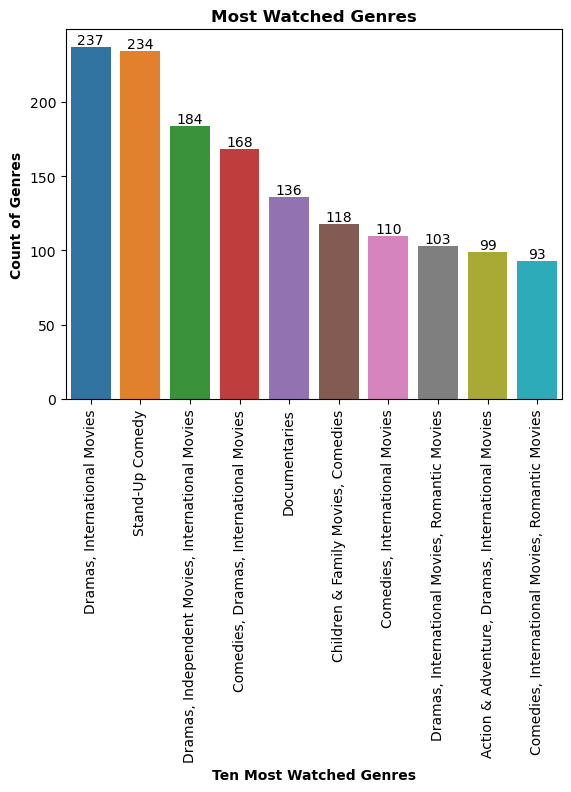

In [28]:
# Plotting of the Bar Chart using Seaborn

try:
    
    # Plot the graph on X and Y axis
    bar_plot = sns.barplot(data=genre_first_ten, x=genere_types, y=count_of_genre, hue="genres")

    # Add data label on the bar of the graph based on count_of_genre
    _ = [bar_plot.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=10, color='black') for p in bar_plot.patches]

    # Make data label display on a 90 degrees
    plt.xticks(rotation=90)

    # Adding titles and labels
    plt.title("Most Watched Genres", fontweight='bold')
    plt.xlabel("Ten Most Watched Genres", fontweight='bold')
    plt.ylabel("Count of Genres", fontweight='bold')

    # Save the graph
    plt.savefig("Python_genre_most_watched.png")

# Error Handling for Exception (Task 4)
except Exception as e:
    error_message = {"message":str(e)}
    print(error_message)


In [30]:
# Ratings distribution visualizating using Histogram

try:

    # Filter the rating column from the master list
    rating_filter = df["rating"]

    # Do a count of the rating_types 
    rating_count = rating_filter.value_counts()

    # Create a pandas dataframe of the rating_types and count
    rating_dataset = pd.DataFrame(rating_count).rename(columns={"count" : "count_of_rating"}).reset_index()

    # To Print the Rating Distribution
    rating_dataset

# Error Handling for Exception (Task 4)
except Exception as e:
    error_message = {"message":str(e)}
    print(error_message)


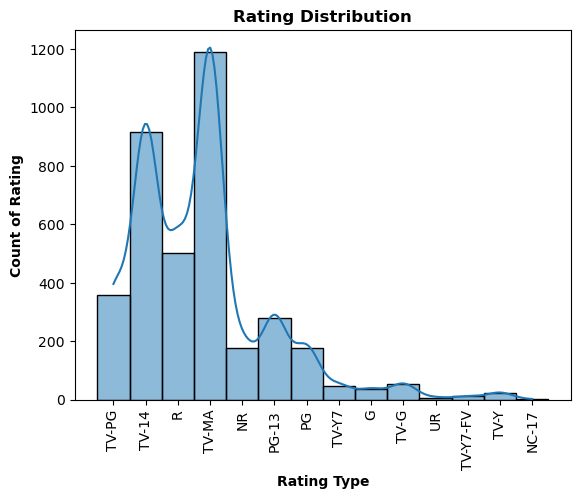

In [32]:
# Plotting of the Bar Chart using Seaborn
try:

    # Plot the graph on X and Y axis
    sns.histplot(data=rating_filter, kde=True, )

    # Make data label display on a 90 degrees
    plt.xticks(rotation=90)

    # Adding titles and labels
    plt.title("Rating Distribution", fontweight='bold')
    plt.xlabel("Rating Type", fontweight='bold')
    plt.ylabel("Count of Rating", fontweight='bold')

    # Save the graph
    plt.savefig("Python_Rating_Distribution.png")

# Error Handling for Exception (Task 4)
except Exception as e:
    error_message = {"message":str(e)}
    print(error_message)
